In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.xkcd() # for fun
# as an example, my personal tweaks for matplotlib graphs
from my_graph import set_plot # download at 

# Why doing analytical work ?

 In the era of huge computational power, when trying to provide quantitative relations between physical observables and find their solutions, why still doing analytical work ?

- It forces the scientist to try approximations that would enable analytical solutions, this helps to reduce the complexity and identify the main contributions to the observed effects. To forge intuitions about the phenomena.

- The _numerical solution_ of a given set of equation is **not** general, it is linked to a discretization scheme. A different scheme will give a different result ! (though a lot of efforts are put to solve this problem) Analytical solutions provide ***universal*** results.

- An analytical solution is a _closed-form_ solution, whereas for a numerical solution, one needs to launch a dynamical system and no ones knows what can happen, e.g. chaotic dynamics

- Elegance / Beauty. 


### _And python provides a way to do the maths !!_

# Introduction to Sympy

SymPy is a Python library for symbolic mathematics. 

see : http://www.sympy.org/en/index.html

where the documentation can be found

In [ ]:
# quick try
from sympy import *


# Insight from an example mathematical problem :

# Evaluating the price of an option

### Why an example from financial maths ?

- Everyone has a vague idea of the concepts

- Very nasty calculus (long and boring) though the mathematics are not too complex conceptually $\rightarrow$ perfect to illustrate the use of SymPy



# Some preriquisites about financial products

- what is a share ? https://en.wikipedia.org/wiki/Share_%28finance%29

In financial markets, a share is a unit of account for various investments. It often means the stock of a corporation, [...]

- what is an option ? https://en.wikipedia.org/wiki/Option_%28finance%29

In finance, an option is a contract which gives the buyer (the owner or holder) the right, but not the obligation, to buy or sell an underlying asset or instrument at a specified strike price on or before a specified date.

### (the historical one) the put option

Let's take the perspective of a Farmer.

"I grow wheat. i harvest at the end of august, i need to sell in september. But the market shows a lot of variability..."



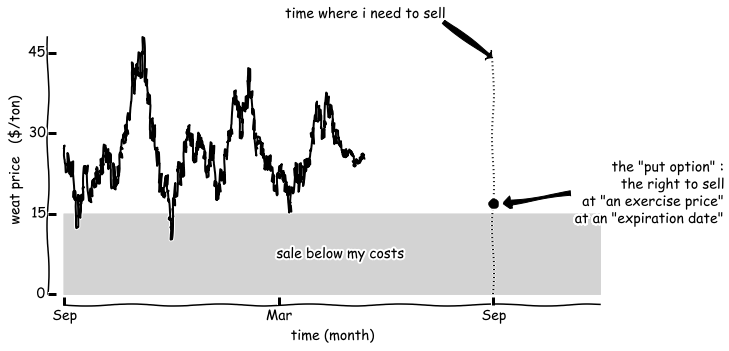

In [136]:
np.random.seed(3)
price = 25.5+np.convolve(np.random.randn(1e3), np.exp(-.01*np.arange(100))) 

fig, ax = plt.subplots(1, figsize=(10,5))

ax.plot(np.linspace(0,1.4,len(price)), price, 'k-')
ax.plot([2,2], [0, price.max()-4], 'k:')
ax.plot([2], [17], 'ko', ms=10)
ax.fill_between(np.linspace(0,2.5,len(price)), 0*price+15, 0*price, color='lightgray')

ax.annotate('time where i need to sell', xy=(2, price.max()-4),  xycoords='data', xytext=(0.7, 1.05),\
   textcoords='axes fraction', arrowprops=dict(facecolor='black'), horizontalalignment='right', verticalalignment='top')
ax.annotate('sale below my costs', (.4,.15),  xycoords='axes fraction')
ax.annotate('the \"put option\" : \n the right to sell \n  at \"an exercise price\" \n at an \"expiration date\" ',\
            xy=(2.05, 17),  xycoords='data', xytext=(1.2, .5), textcoords='axes fraction',\
            arrowprops=dict(facecolor='black'), horizontalalignment='right', verticalalignment='top')
set_plot(ax, xlabel='time (month)', ylabel='weat price   (\$/ton)', xticks=[0,1,2], xticks_labels=['Sep','Mar','Sep'])

"The market price will make me benefits as an average, but because i have a fixed selling date, this might fall in the moment of a low price and there is the risk that i have to sell below costs !"

"I want to protect myself from those fluctuations !"

"So i will buy a contract (a sort of insurance contract) to someone that guarantees to buy to me my wheat at an "exercise price" at an "expiration date", he takes very few risks, if he has the ability to store it, he can wait and sell it later..."


### the call option

Same thing but reversed, for the buyer

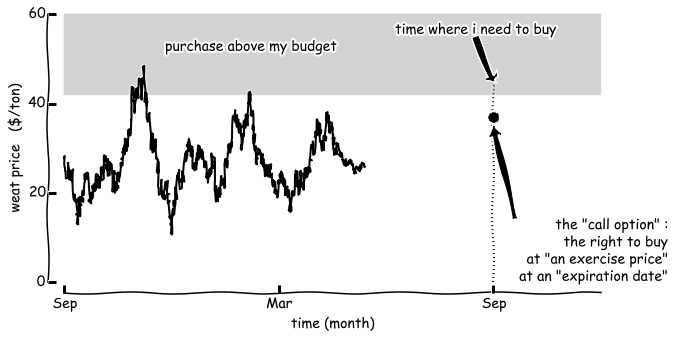

In [137]:
np.random.seed(3)
price = 26.+np.convolve(np.random.randn(1e3), np.exp(-.01*np.arange(100)))

fig, ax = plt.subplots(1, figsize=(10,5))

ax.plot(np.linspace(0,1.4,len(price)), price, 'k-')
ax.plot([2,2], [0, 45], 'k:')
ax.plot([2], [37], 'ko', ms=10)
ax.fill_between(np.linspace(0,2.5,len(price)), 0*price+42, 0*price+60, color='lightgray')

ax.annotate('time where i need to buy', xy=(2, 45),  xycoords='data', xytext=(0.9, .95),\
   textcoords='axes fraction', arrowprops=dict(facecolor='black'), horizontalalignment='right', verticalalignment='top')
ax.annotate('purchase above my budget', (.2,.85),  xycoords='axes fraction')
ax.annotate('the \"call option\" : \n the right to buy \n  at \"an exercise price\" \n at an \"expiration date\" ',\
            xy=(2., 35),  xycoords='data', xytext=(1.1, .25), textcoords='axes fraction',\
            arrowprops=dict(facecolor='black'), horizontalalignment='right', verticalalignment='top')
set_plot(ax, xlabel='time (month)', ylabel='weat price   (\$/ton)', xticks=[0,1,2], xticks_labels=['Sep','Mar','Sep'])

Again , in this case, this offers me a security, i am sure to by at an acceptable price...

But of course if the market price is lower, i won't use the option, i will buy at the market price.

### From now on, we will stick to the "call option" 


## How to determine the price of the option ?

Well, it should depend on :

- the "exercise price"

- the amplitude of the fluctuations

- the speed of the variations

- the price at the moment of the contract

- how close will be the "expiration date"




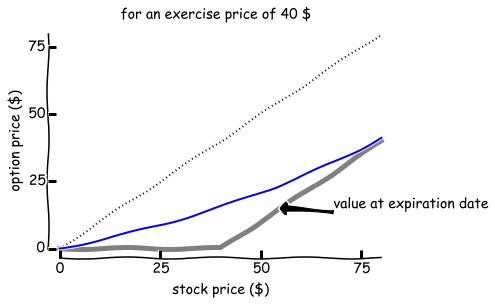

In [168]:
fig, ax = plt.subplots(1)
plt.suptitle('for an exercise price of 40 \$')

plt.plot([0,80], [0,80], 'k:', lw=2)
plt.plot([0,40,80], [0,0,40], '-', color='gray', lw=5)
plt.plot(np.linspace(0,80), 24.*(np.exp(np.linspace(0,80)/80.)-1))
ax.annotate('value at expiration date',\
            xy=(55, 15),  xycoords='data', xytext=(1.3, .25), textcoords='axes fraction',\
            arrowprops=dict(facecolor='black'), horizontalalignment='right', verticalalignment='top')

set_plot(ax, xlabel='stock price (\$)', ylabel='option price (\$)')

Let's download the history of the shares of the company "Google Inc." from Sep. 2005 to Sep. 2012

of course, google has this :

https://www.google.com/finance/historical?cid=694653&startdate=Sep+12%2C+2005&enddate=Sep+11%2C+2012&num=30&ei=EPbyVcDDKNjDUJSCuOAC

we download the following spreadsheet :

http://www.google.com/finance/historical?cid=694653&startdate=Sep+12%2C+2005&enddate=Sep+11%2C+2012&num=30&ei=EPbyVcDDKNjDUJSCuOAC&output=csv

In [5]:
# then we open it with numpy, it's a csv file, so you open it with numpy.recfromcsv

FILE = '/home/yann/Desktop/googl.csv' # put where you download files

GE_raw_data = np.recfromcsv(FILE)


In [1]:
import sys
sys.path.append('https://github.com/yzerlaut/neuroneap/blob/master/eap/cell.py')

In [6]:
# numpy is so smart, it guesses how the data look like

# let's look at the first element
GE_raw_data[-1]

('12-Sep-05', 151.03, 155.87, 150.65, 155.02, 10392015)

from the website we know that those values correspond to respectively

- Date

- Value at market opening

- Highest value during the day

- Lowest value during the day

- Value at market closing

- Volume of exchanged shares

So let's reformat the data, to have this more clearly

in particular, the date is a string, that is not so convenient for plotting !

In [7]:
data = {} # let's construct the data as a dictionary

monthes = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
def convert_month_in_year_fraction(month):
    # a month is a twelvth of a year
    #return 1./12.*float([0][0])
    if len(np.argwhere(monthes==month))==0:
        print month
    return 1./12.*float(np.argwhere(month==monthes, )[0][0])

def convert_day_in_year_fraction(day):
    return day/365.

data['date'], data['opening'], data['low'], data['high'], data['closing'], data['volume'] = \
       [np.zeros(len(GE_raw_data), dtype=float) for i in range(6)] # we initialize the arrays
    
    
for i in range(len(GE_raw_data)):
    # reformating the date
    Date = GE_raw_data[i][0]
    day, month, year = Date.split('-') # we obtain 3 strings by splitting the date with '-'
    data['date'][i] = float(year)+convert_month_in_year_fraction(month)+convert_day_in_year_fraction(float(day))
    # then 
    data['opening'][i], data['low'][i], data['high'][i], data['closing'][i], data['volume'][i] =\
       [GE_raw_data[i][j] for j in range(1,6)] # we initialize the arrays
    


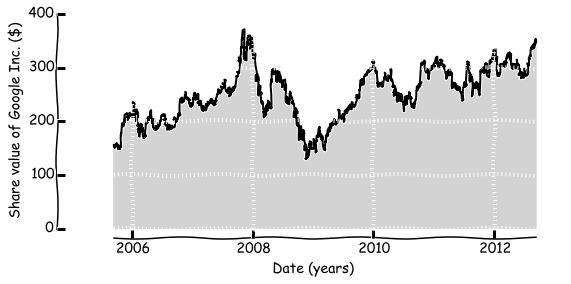

In [8]:
fig, ax = plt.subplots(1, figsize=(9,4))
ax.plot(2000+data['date'], data['closing'], 'k-', lw=2)
plt.fill_between(2000+data['date'], data['closing'], 0*data['closing'], color='lightgray')#to visually enhance positive values ^^
plt.grid()
set_plot(ax, xlabel='Date (years)', ylabel='Share value of Google Inc. (\$)',\
         xticks=[2006, 2008, 2010, 2012], xticks_labels=['2006', '2008', '2010', '2012'])



In [9]:
## my rewriting of the autocorrelation function

def autocorrel(signal, tmax, dt):
    """
    argument : signal (np.array), tmax and dt (float)
    tmax, is the maximum length of the autocorrelation that we want to see
    returns : autocorrel (np.array), time_shift (np.array)
    take a signal of time sampling dt, and returns its autocorrelation
     function between [0,tstop] (normalized) !!
    """
    steps = int(tmax/dt) # number of steps to sum on
    signal = (signal-signal.mean())/signal.std()
    cr = np.correlate(signal[steps:],signal)/steps
    time_shift = np.arange(len(cr))*dt
    print dt
    return cr/cr.max(),time_shift

0.0039712033337


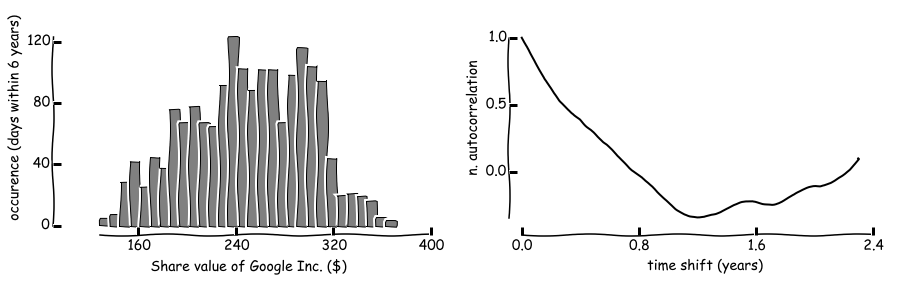

In [10]:
fig, AX = plt.subplots(1, 2, figsize=(15, 4))
# histogram of the data
AX[0].hist(data['closing'], bins=30, color='gray')
set_plot(AX[0], xlabel='Share value of Google Inc. (\$)', ylabel='occurence (days within 6 years)')
# autocorrelation of the evolution of the share
AC, time_shift = autocorrel(data['closing'], 2.3, -np.diff(data['date']).mean())
AX[1].plot(time_shift, AC, 'k')
set_plot(AX[1], xlabel='time shift (years)', ylabel='n. autocorrelation')